In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [2]:
df_2025 = pd.read_csv("./data/tmdb_2025.csv")
df_2025.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,NaN,NaN,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,NaN,NaN,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
2,STRAW,2025-06-05,movie,105.0,NaN,NaN,"Thriller, Drama, Crime",Tyler Perry,"Taraji P. Henson, Sherri Shepherd, Teyana Tayl...",US,en,Tyler Perry Studios,What will be her last straw? A devastatingly b...,"angry, aggressive, hopeless, anxious, provocat...",8.118,484
3,Predator: Killer of Killers,2025-06-05,movie,85.0,NaN,NaN,"Animation, Action, Science Fiction",Dan Trachtenberg,"Lindsay LaVanchy, Louis Ozawa, Rick Gonzalez, ...",US,en,"20th Century Studios, Davis Entertainment, Law...",While three of the fiercest warriors in human ...,"world war ii, pilot, vikings (norsemen), antho...",7.981,525
4,Lilo & Stitch,2025-05-17,movie,108.0,NaN,NaN,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650


In [3]:
# 날짜 칼럼을 datetime 형식으로 변환
df_2025['release_date'] = pd.to_datetime(df_2025['release_date'])

# 원하는 기간 필터링: 2025년 1월 1일 ~ 2025년 5월 31일
filtered_df = df_2025[
    df_2025['release_date'].between('2025-01-01', '2025-05-31')
]
filtered_df.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,NaN,NaN,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,NaN,NaN,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,NaN,NaN,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,NaN,NaN,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,NaN,NaN,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48


In [4]:
df_2025 = filtered_df
df_2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11703 entries, 0 to 15028
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11703 non-null  object        
 1   release_date        11703 non-null  datetime64[ns]
 2   type                11703 non-null  object        
 3   runtime             6828 non-null   float64       
 4   season_count        4325 non-null   float64       
 5   episode_count       4325 non-null   float64       
 6   genre               9510 non-null   object        
 7   director            8006 non-null   object        
 8   cast                9235 non-null   object        
 9   country             11662 non-null  object        
 10  language            11703 non-null  object        
 11  production_company  6758 non-null   object        
 12  synopsis            8968 non-null   object        
 13  tags                2918 non-null   object        


In [5]:
df_2025.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
7956,"""Given The Movie: To the Sea"" Live Performance...",2025-03-26,movie,120.0,NaN,NaN,Music,NaN,"Fumiya Imai, Shogo Yano, Centimillimental, Yum...",JP,ja,Aniplex,The official Film for the Centimillimental × G...,stage performance,0.0,0
10191,#1 Happy Family USA,2025-04-17,tv,NaN,1.0,8.0,"Animation, Comedy",NaN,"Ramy Youssef, Alia Shawkat, Salma Hindy, Randa...",US,en,"Cairo Cowboy, A24, Amazon MGM Studios, Wounded...",An exploration of the experiences of a Muslim-...,NaN,7.1,8
5144,#300letters,2025-03-26,movie,91.0,NaN,NaN,"Comedy, Romance",Lucas Santa Ana,"Cristian Mariani, Gastón Frías, Bruno Giganti,...","DE, AR, GB",es,"locodelaltillo (AR), Matchbox Films",Jero (25) and Tom (25) are the perfect couple ...,NaN,0.0,1
12851,"#All of Them. Debanhi, a story of networks",2025-03-07,tv,198.0,1.0,3.0,"Documentary, Crime",Arisbeth Márquez,NaN,MX,es,N+,A documentary that portrays solidarity network...,NaN,7.5,8
14046,#CoupleChallenge - Das stärkste Team gewinnt,2025-03-06,tv,NaN,1.0,4.0,NaN,NaN,NaN,DE,de,NaN,NaN,NaN,0.0,0
3886,#Fitspo,2025-03-31,movie,20.0,NaN,NaN,Drama,Clarissa Charron,"Lucy Karczewski, Lisa Beckwith, Georgia McCall","FR, GB",en,Silk Ruffler Films,A perfectionistic fitness influencer faces jud...,"stress, fitness, meditative, candid, reflectiv...",0.0,0
1270,#Iwilltellyouthetruth,2025-04-25,movie,117.0,NaN,NaN,Mystery,Keisuke Toyoshima,"Motoki Ohmori, Fuma Kikuchi, Ayami Nakajo, Ama...",JP,ja,TOHO,Story about each tale unveils the hidden uneas...,"suspense, mystery",5.0,1
309,#Single,2025-05-09,movie,127.0,NaN,NaN,"Comedy, Romance",Caarthick Raju,"Sree Vishnu, Ketika Sharma, Ivana, Vennela Kis...",IN,te,Geetha Arts,"Vijay, a bank employee, falls in love with Pur...",NaN,5.5,6
13370,#Somebody's Son,2025-04-12,tv,NaN,1.0,6.0,NaN,NaN,NaN,US,en,NaN,"Three charming, single, and successful men emb...",NaN,0.0,0
9915,#Volkskanzler,2025-01-13,movie,8.0,NaN,NaN,Documentary,Sebastian Bobik,NaN,AT,de,NaN,A short film to protest against the probable u...,NaN,0.0,0


In [6]:
df_2025.isnull().sum()

title                    0
release_date             0
type                     0
runtime               4875
season_count          7378
episode_count         7378
genre                 2193
director              3697
cast                  2468
country                 41
language                 0
production_company    4945
synopsis              2735
tags                  8785
imdb_rating              0
imdb_review_count        0
dtype: int64

# 2. 전처리 전처리_type

In [7]:
df_2025[df_2025['season_count'].isna() & df_2025['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,NaN,NaN,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,NaN,NaN,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,NaN,NaN,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,NaN,NaN,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,NaN,NaN,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48


In [8]:
df_2025[df_2025['season_count'].isna() & df_2025['episode_count'].isna()].shape

(7378, 16)

In [9]:
df_2025['type'].value_counts(dropna=False)

type
movie    7378
tv       4325
Name: count, dtype: int64

In [10]:
print(df_2025[df_2025['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2025[df_2025['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    7378
Name: count, dtype: int64
episode_count
NaN    7378
Name: count, dtype: int64


In [11]:
print(df_2025[df_2025['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     4214
2.0       90
5.0        6
3.0        6
4.0        2
6.0        2
7.0        2
12.0       2
17.0       1
Name: count, dtype: int64


In [12]:
print(df_2025[df_2025['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0      988
6.0      402
8.0      344
3.0      288
2.0      282
        ... 
110.0      1
163.0      1
212.0      1
130.0      1
102.0      1
Name: count, Length: 109, dtype: int64


In [13]:
df_2025_1 = df_2025

In [14]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2025_1.loc[df_2025_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2025_1.loc[df_2025_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2025_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,1.0,1.0,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,1.0,1.0,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,1.0,1.0,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,1.0,1.0,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,1.0,1.0,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48


In [15]:
df_2025[(df_2025['type'] == 'tv') & (df_2025['season_count'].isna() | df_2025['episode_count'].isna())]
#df_2025[(df_2025['type'] == 'movie') & (df_2025['season_count'].isna() | df_2025['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count


In [16]:
print(df_2025_1[df_2025_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      8357
6.0       394
8.0       332
3.0       284
2.0       278
         ... 
46.0        1
212.0       1
130.0       1
85.0        1
109.0       1
Name: count, Length: 105, dtype: int64


In [17]:
print(df_2025_1[df_2025_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     8357
2.0        5
3.0        1
12.0       1
5.0        1
17.0       1
Name: count, dtype: int64


In [18]:
df_2025_2 = df_2025_1
df_2025_2.loc[df_2025_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2025_2.loc[df_2025_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2025_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,1.0,1.0,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,1.0,1.0,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,1.0,1.0,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,1.0,1.0,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,1.0,1.0,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48


# 2. 데이터 전처리_runtime

In [19]:
df_2025_2.isnull().sum()

title                    0
release_date             0
type                     0
runtime               4875
season_count             0
episode_count            0
genre                 2193
director              3697
cast                  2468
country                 41
language                 0
production_company    4945
synopsis              2735
tags                  8785
imdb_rating              0
imdb_review_count        0
dtype: int64

In [20]:
df_2025_2.shape

(11703, 16)

In [21]:
df_2025_2[df_2025_2['runtime'].isna() & df_2025_2['genre'].isna() ].shape

(1536, 16)

## 2_2 runtime null 값 열 제거

In [22]:
df_2025_3 = df_2025_2

In [23]:
df_2025_3.dropna(subset=['runtime'], inplace=True)

In [24]:
df_2025_3.shape

(6828, 16)

# 2. 데이터 전처리_pr

In [25]:
df_2025_4 = df_2025_3
df_2025_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,1.0,1.0,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,1.0,1.0,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,1.0,1.0,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,1.0,1.0,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,1.0,1.0,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,行至爱意消散处,2025-01-21,tv,30.0,1.0,2.0,Drama,NaN,"路文卓, 皮德胜",CN,zh,bilibili,NaN,NaN,7.000,1
14797,欢迎来到21世纪,2025-04-01,tv,30.0,1.0,2.0,"Action & Adventure, Drama",NaN,初五,CN,zh,Tencent Video,NaN,NaN,7.000,1
14831,Achter De Rode Neus,2025-05-31,tv,22.0,1.0,3.0,NaN,NaN,NaN,NL,nl,NaN,The CliniClowns have been working with healthc...,NaN,0.000,0
14872,Enlèvement demandé : le quotidien des fourrières,2025-04-15,tv,65.0,1.0,3.0,"Documentary, Reality",NaN,NaN,FR,fr,"StudioFact, RMC Production",NaN,NaN,0.000,0


In [26]:
df_2025_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6828 entries, 0 to 14932
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               6828 non-null   object        
 1   release_date        6828 non-null   datetime64[ns]
 2   type                6828 non-null   object        
 3   runtime             6828 non-null   float64       
 4   season_count        6828 non-null   float64       
 5   episode_count       6828 non-null   float64       
 6   genre               6171 non-null   object        
 7   director            5975 non-null   object        
 8   cast                6051 non-null   object        
 9   country             6806 non-null   object        
 10  language            6828 non-null   object        
 11  production_company  4538 non-null   object        
 12  synopsis            6449 non-null   object        
 13  tags                2388 non-null   object        
 

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [27]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2025_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 37


In [28]:
# 2. 삭제: 그런 행 삭제
df_2025_4_cleaned = df_2025_4.loc[~nan_rows].copy()

In [29]:
df_2025_4 = df_2025_4.loc[~nan_rows].copy()
df_2025_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6791 entries, 0 to 14932
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               6791 non-null   object        
 1   release_date        6791 non-null   datetime64[ns]
 2   type                6791 non-null   object        
 3   runtime             6791 non-null   float64       
 4   season_count        6791 non-null   float64       
 5   episode_count       6791 non-null   float64       
 6   genre               6171 non-null   object        
 7   director            5961 non-null   object        
 8   cast                6022 non-null   object        
 9   country             6769 non-null   object        
 10  language            6791 non-null   object        
 11  production_company  4523 non-null   object        
 12  synopsis            6449 non-null   object        
 13  tags                2386 non-null   object        
 

In [30]:
df_2025_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,Final Destination Bloodlines,2025-05-14,movie,109.0,1.0,1.0,"Horror, Mystery","Zach Lipovsky, Adam B. Stein","Kaitlyn Santa Juana, Teo Briones, Richard Harm...",US,en,"New Line Cinema, Practical Pictures, Freshman ...","Plagued by a violent recurring nightmare, coll...","restaurant, gore, sequel, premonition, fate, f...",7.166,826
1,The Amateur,2025-04-09,movie,123.0,1.0,1.0,"Thriller, Action",James Hawes,"Rami Malek, Holt McCallany, Danny Sapani, Rach...",US,en,"20th Century Studios, Hutch Parker Entertainme...",After his life is turned upside down when his ...,"central intelligence agency (cia), based on no...",6.907,523
4,Lilo & Stitch,2025-05-17,movie,108.0,1.0,1.0,"Family, Science Fiction, Comedy, Adventure",Dean Fleischer Camp,"Maia Kealoha, Sydney Agudong, Chris Sanders, Z...",US,en,"Walt Disney Pictures, Rideback",The wildly funny and touching story of a lonel...,"hawaii, bullying, dysfunctional family, loss o...",7.086,650
5,The Accountant²,2025-04-23,movie,133.0,1.0,1.0,"Mystery, Crime, Thriller",Gavin O'Connor,"Ben Affleck, Jon Bernthal, Cynthia Addai-Robin...",US,en,"Artists Equity, 51 Entertainment, Zero Gravity...","When an old acquaintance is murdered, Wolff is...","hitman, autism, sequel, conspiracy, whodunit, ...",7.200,819
8,Mikaela,2025-01-31,movie,90.0,1.0,1.0,"Action, Thriller",Daniel Calparsoro,"Antonio Resines, Natalia Azahara, Roger Casama...",ES,es,"Atlantia Media, Atresmedia, La Terraza Films, ...","During the eve of the 6th of January, a record...","snowstorm, cop, traffic jam, heist, disaster",6.250,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,行至爱意消散处,2025-01-21,tv,30.0,1.0,2.0,Drama,NaN,"路文卓, 皮德胜",CN,zh,bilibili,NaN,NaN,7.000,1
14797,欢迎来到21世纪,2025-04-01,tv,30.0,1.0,2.0,"Action & Adventure, Drama",NaN,初五,CN,zh,Tencent Video,NaN,NaN,7.000,1
14831,Achter De Rode Neus,2025-05-31,tv,22.0,1.0,3.0,NaN,NaN,NaN,NL,nl,NaN,The CliniClowns have been working with healthc...,NaN,0.000,0
14872,Enlèvement demandé : le quotidien des fourrières,2025-04-15,tv,65.0,1.0,3.0,"Documentary, Reality",NaN,NaN,FR,fr,"StudioFact, RMC Production",NaN,NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [31]:
nan_both = df_2025_4[(df_2025_4['director'].isna()) & (df_2025_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 157


In [32]:
df_2025_4 = df_2025_4.dropna(subset=['director', 'cast'], how='all')

In [33]:
df_2025_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6634 entries, 0 to 14797
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               6634 non-null   object        
 1   release_date        6634 non-null   datetime64[ns]
 2   type                6634 non-null   object        
 3   runtime             6634 non-null   float64       
 4   season_count        6634 non-null   float64       
 5   episode_count       6634 non-null   float64       
 6   genre               6050 non-null   object        
 7   director            5961 non-null   object        
 8   cast                6022 non-null   object        
 9   country             6612 non-null   object        
 10  language            6634 non-null   object        
 11  production_company  4452 non-null   object        
 12  synopsis            6333 non-null   object        
 13  tags                2370 non-null   object        
 

# tag npl처리

In [34]:
# 1. tags 결측치는 빈 문자열로 대체
df_2025_4['tags'] = df_2025_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2025_4['synopsis'] = df_2025_4['synopsis'].fillna('')
df_2025_4['genre'] = df_2025_4['genre'].fillna('')
df_2025_4['text_input'] = df_2025_4['synopsis'] + ' ' + df_2025_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2025_4[df_2025_4['tags'] != ''].copy()
test_df = df_2025_4[df_2025_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2025_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/14771476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['tags'] = df_2025_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/14771476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['synopsis'] = df_2025_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/14771476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [35]:
df_2025_4['tags'].value_counts(dropna=False)

tags
NaN                                                       177
drama                                                     141
 drama                                                     69
thriller, drama                                            61
 short film                                                52
                                                         ... 
musical, sexual harassment, protest march, campus life      1
romance, animation, drama, nostalgic                        1
drama, adventure, action, coming-of-age                     1
cooking, italian food, culinary arts                        1
romance, historical, action, folklore                       1
Name: count, Length: 4503, dtype: int64

# country에서 nan은 language와 같은 값으로 처리

In [36]:
df_2025_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director               673
cast                   612
country                 22
language                 0
production_company    2182
synopsis                 0
tags                   177
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [37]:
df_2025_4['country'].fillna(df_2025_4['language'], inplace=True)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/3392914231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2025_4['country'].fillna(df_2025_4['language'], inplace=True)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/3392914231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['country'].filln

In [38]:
df_2025_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director               673
cast                   612
country                  0
language                 0
production_company    2182
synopsis                 0
tags                   177
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [39]:
df_2025_4['production_company'].value_counts(dropna=False)

production_company
NaN                                                                      2182
Vivamax                                                                    24
bilibili                                                                   17
World Wrestling Entertainment (WWE)                                        16
iQIYI                                                                      10
                                                                         ... 
Motto Pictures                                                              1
Juno11 Pictures, BIND, Squirrel Film (HU), Planet X                         1
Universidad del Cine, Mecenazgo Cultural, Fondo Nacional de las Artes       1
Dreamtool Entertainment                                                     1
Cuarzo Producciones                                                         1
Name: count, Length: 3979, dtype: int64

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [40]:
unique_count = df_2025_4['production_company'].nunique(dropna=True)
print(unique_count)

3978


In [41]:
df_2025_4['production_company_is_missing'] = df_2025_4['production_company'].isna().astype(int)
df_2025_4['production_company'] = df_2025_4['production_company'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/3369767619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['production_company_is_missing'] = df_2025_4['production_company'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/3369767619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['production_company'] = df_2025_4['production_company'].fillna('unknown')


In [42]:
df_2025_4['cast_is_missing'] = df_2025_4['cast'].isna().astype(int)
df_2025_4['cast'] = df_2025_4['cast'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/1600149580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['cast_is_missing'] = df_2025_4['cast'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/1600149580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['cast'] = df_2025_4['cast'].fillna('unknown')


In [43]:
df_2025_4['director_is_missing'] = df_2025_4['director'].isna().astype(int)
df_2025_4['director'] = df_2025_4['director'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/1019100464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['director_is_missing'] = df_2025_4['director'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/1019100464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025_4['director'] = df_2025_4['director'].fillna('unknown')


In [44]:
print(df_2025_4.shape)
print(df_2025_4.isnull().sum())

(6634, 20)
title                              0
release_date                       0
type                               0
runtime                            0
season_count                       0
episode_count                      0
genre                              0
director                           0
cast                               0
country                            0
language                           0
production_company                 0
synopsis                           0
tags                             177
imdb_rating                        0
imdb_review_count                  0
text_input                         0
production_company_is_missing      0
cast_is_missing                    0
director_is_missing                0
dtype: int64


In [45]:
nan_tags_rows = df_2025_4[df_2025_4['tags'].isna()]
nan_tags_rows

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count,text_input,production_company_is_missing,cast_is_missing,director_is_missing
58,Van Gogh by Vincent,2025-03-26,movie,46.0,1.0,1.0,Documentary,Richard Shaw,"Zahra Ahmadi, Jack Etchells, Adam Woolley, Fra...",US,fr,Unity House Productions,"In a career that lasted only ten years, Vincen...",NaN,5.941,17,"In a career that lasted only ten years, Vincen...",0,0,0
422,Rewriting Trump,2025-03-03,movie,97.0,1.0,1.0,Documentary,"Arthur Carey, Yasmine Permaul","Michael Wolff, Donald Trump, JD Vance, Stormy ...",GB,en,Sky Studios,"Follows Trump's White House return bid, featur...",NaN,7.500,2,"Follows Trump's White House return bid, featur...",0,0,0
810,"I Know Catherine, the Log Lady",2025-04-09,movie,109.0,1.0,1.0,Documentary,Richard Green,"Catherine E. Coulson, David Lynch, Kyle MacLac...",US,en,"Next Step Studios, History of Cool",An authorized feature documentary about Cather...,NaN,0.000,0,An authorized feature documentary about Cather...,0,0,0
1089,WWE Elimination Chamber 2025 Post Show,2025-03-01,movie,97.0,1.0,1.0,,unknown,"Dwayne Johnson, Bianca Crawford, Ettore Ewen, ...",US,en,World Wrestling Entertainment (WWE),WWE Superstars and analysts examine the fallou...,NaN,0.000,0,WWE Superstars and analysts examine the fallou...,0,0,1
1376,Making Emilia Pérez,2025-01-27,movie,28.0,1.0,1.0,Documentary,unknown,"Jacques Audiard, Zoe Saldaña, Karla Sofía Gasc...",US,en,unknown,"Go behind the scenes of this Oscar-nominated, ...",NaN,4.000,2,"Go behind the scenes of this Oscar-nominated, ...",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,Susan Calman's Cruise of a Lifetime,2025-01-03,tv,45.0,1.0,5.0,,unknown,Susan Calman,GB,en,Daisybeck Studios,"Susan experiences her most ambitious, adventur...",NaN,0.000,0,"Susan experiences her most ambitious, adventur...",0,0,1
13882,(G)I-DLE - 2024 (G)I-DLE WORLD TOUR [iDOL] IN ...,2025-01-02,tv,283.0,2.0,7.0,Documentary,unknown,"Minnie, Jeon So-yeon, Song Yuqi, Cho Mi-yeon, ...",KR,ko,unknown,"""As part of their third world tour, “I-dol,” (...",NaN,0.000,0,"""As part of their third world tour, “I-dol,” (...",1,0,1
13983,Parlons info !,2025-02-12,tv,90.0,1.0,7.0,"Talk, News",unknown,Julie Hammett,FR,fr,"BFMTV, NextProd",,NaN,0.000,0,"Talk, News",0,0,1
14421,Tout le monde veut savoir,2025-02-12,tv,60.0,1.0,1.0,"News, Talk",unknown,Benjamin Duhamel,FR,fr,BFMTV,,NaN,0.000,0,"News, Talk",0,0,1


In [46]:
df_2025_5 = df_2025_4[df_2025_4['tags'].notna()].copy()
df_2025_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6457 entries, 0 to 14797
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   title                          6457 non-null   object        
 1   release_date                   6457 non-null   datetime64[ns]
 2   type                           6457 non-null   object        
 3   runtime                        6457 non-null   float64       
 4   season_count                   6457 non-null   float64       
 5   episode_count                  6457 non-null   float64       
 6   genre                          6457 non-null   object        
 7   director                       6457 non-null   object        
 8   cast                           6457 non-null   object        
 9   country                        6457 non-null   object        
 10  language                       6457 non-null   object        
 11  production_company   

In [48]:
df = pd.read_csv('./data/2025년도 전처리_may.csv')

## 영화/tv 비율

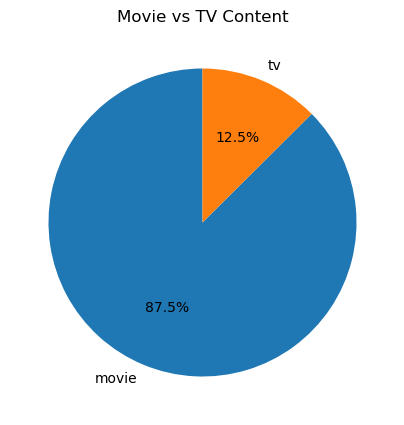

In [50]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [51]:
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## runtime 분포

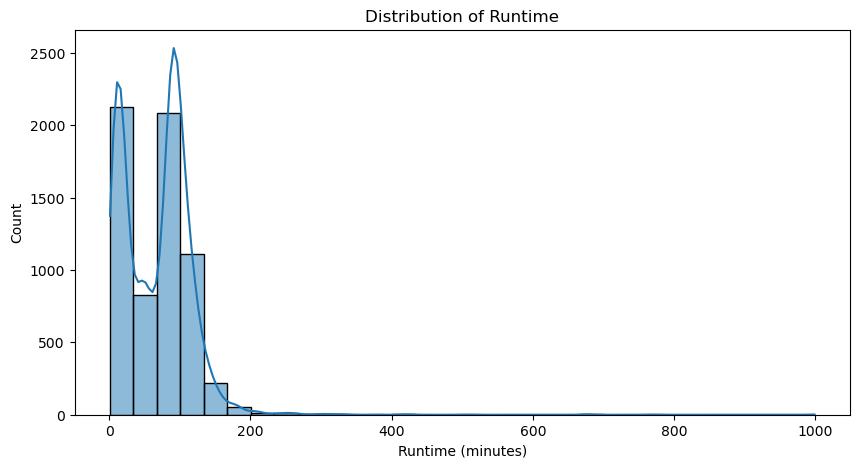

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르 분포

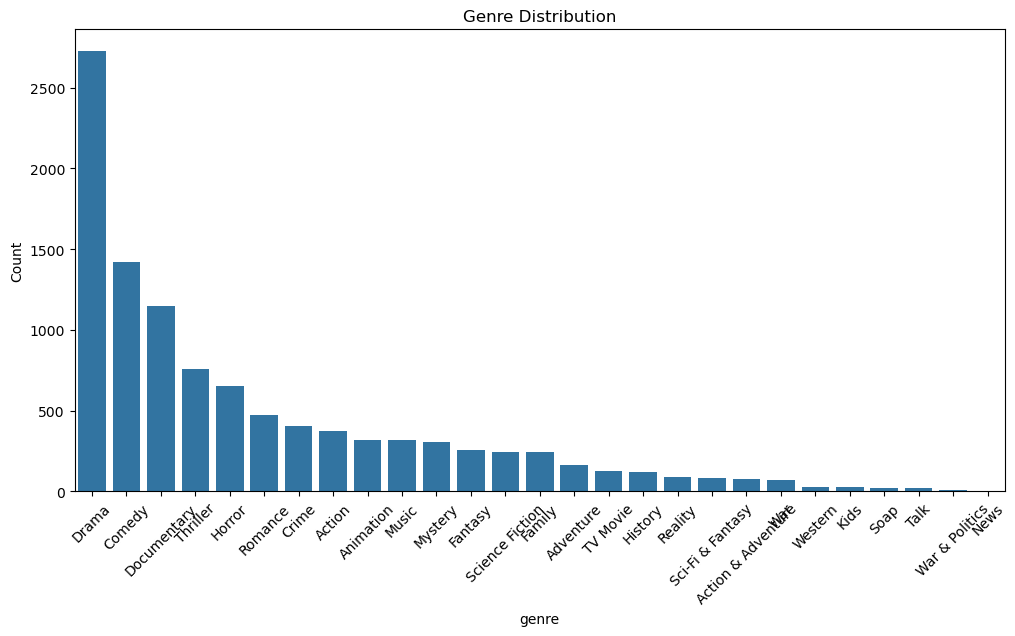

In [53]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 국가 분포

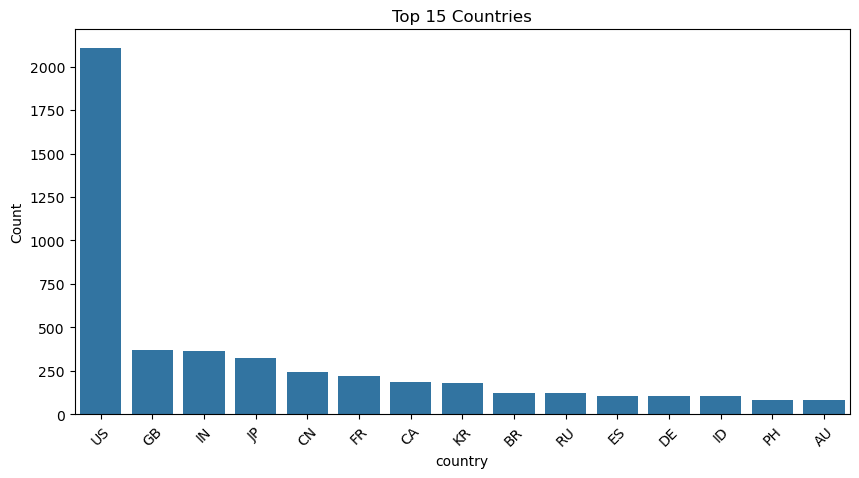

In [54]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

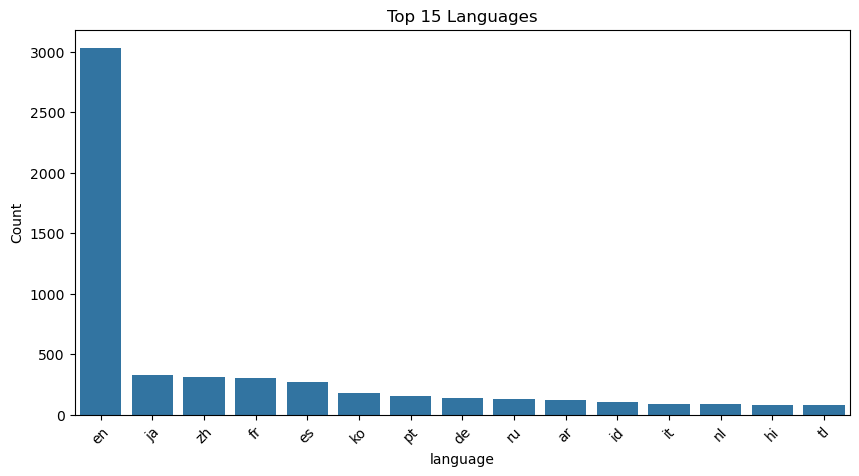

In [55]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb_rating 분포

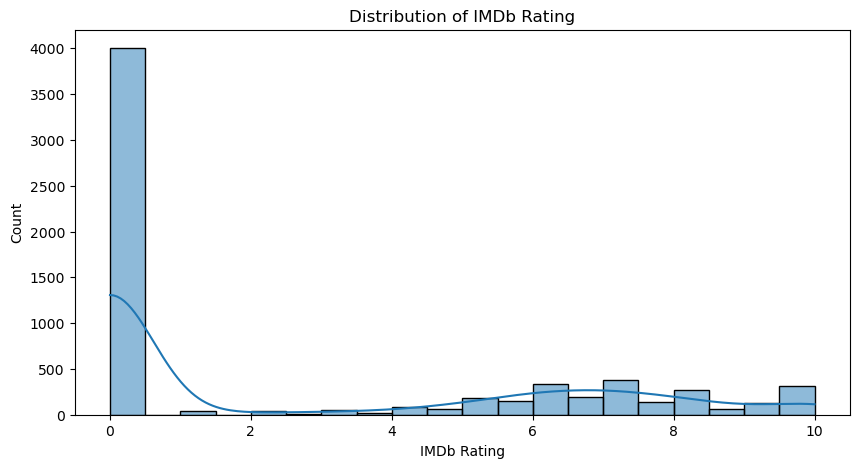

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

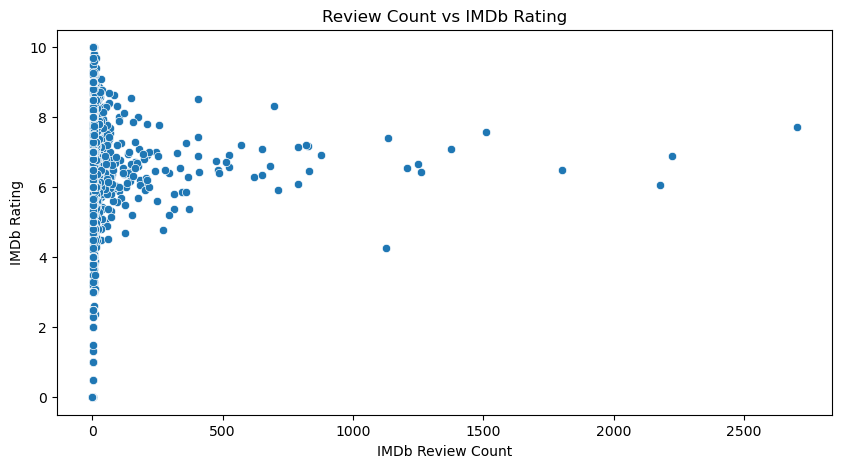

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

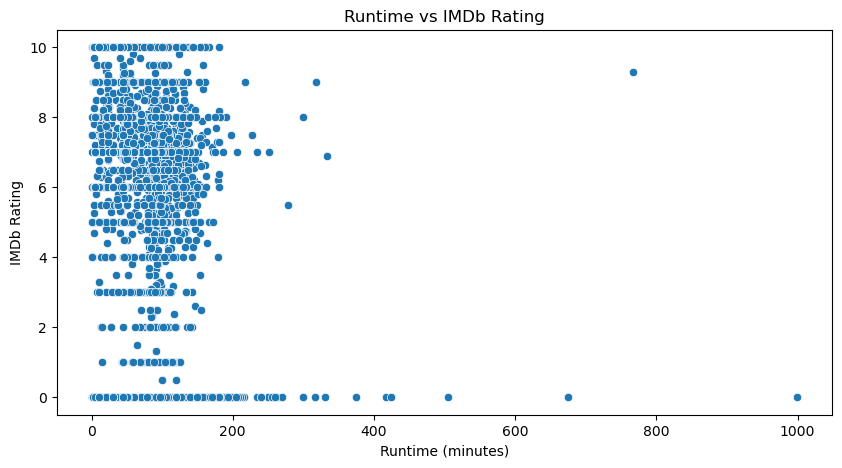

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

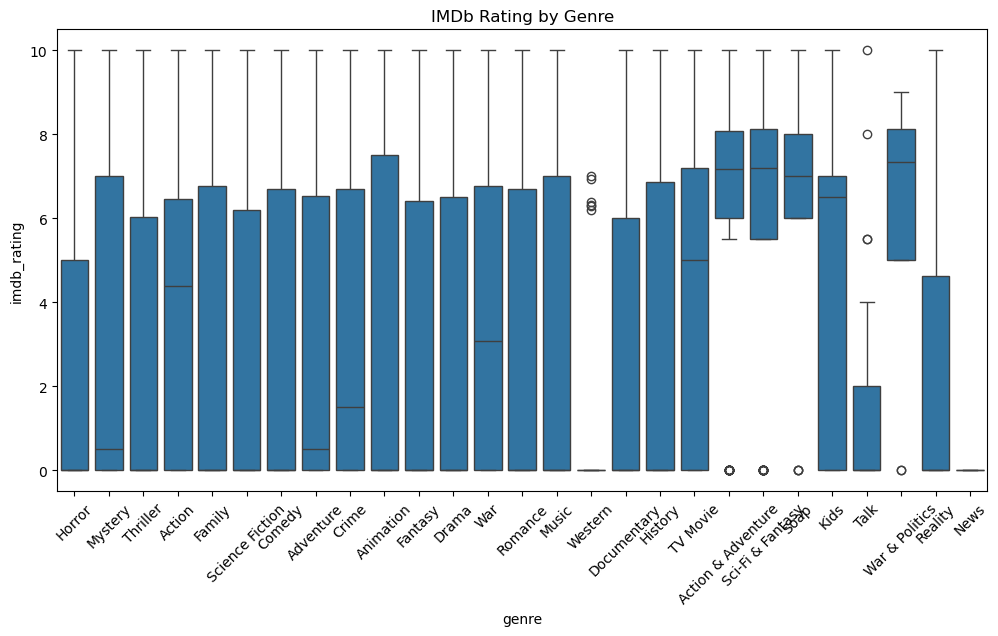

In [60]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## country 별 장르분포

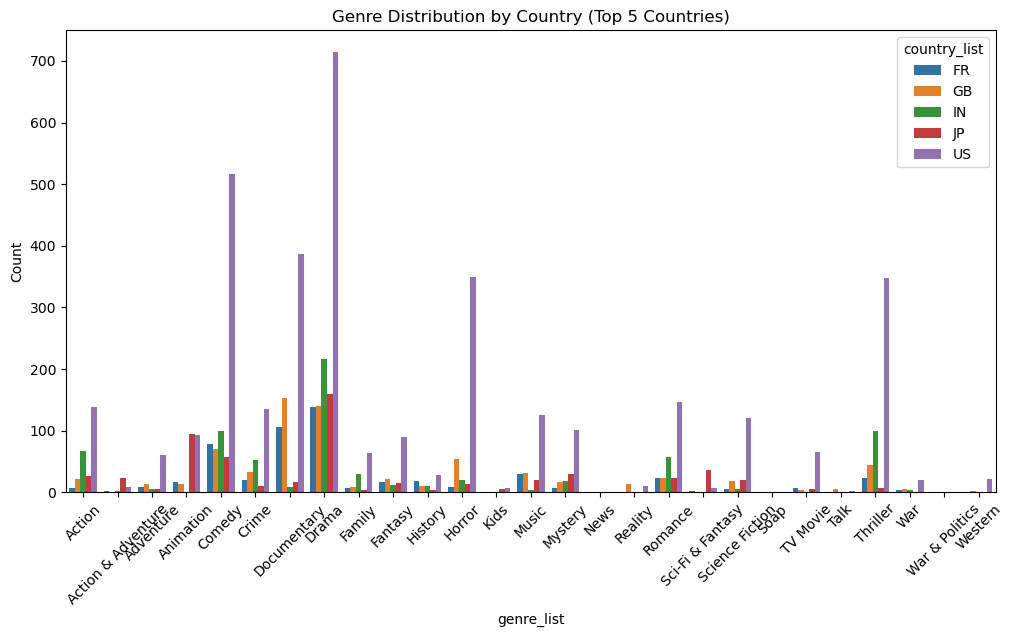

In [61]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석, 감독별 평균 평점

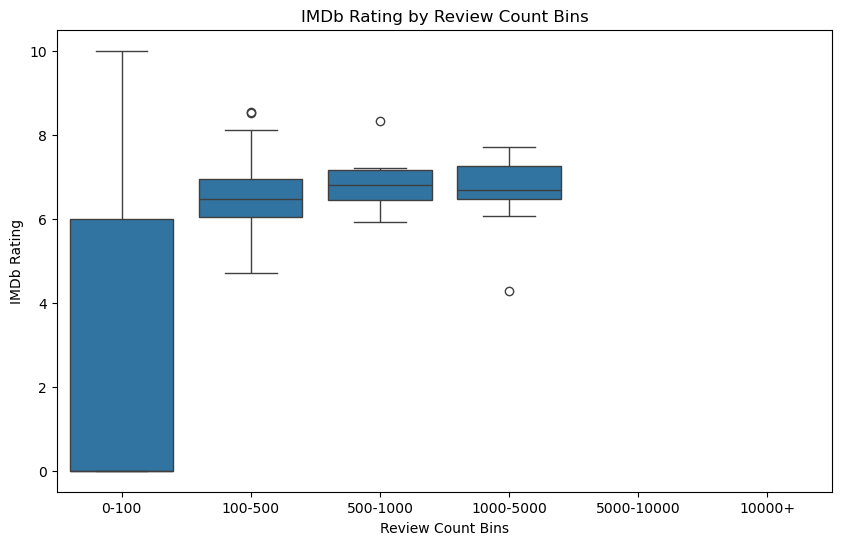

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/2320749319.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


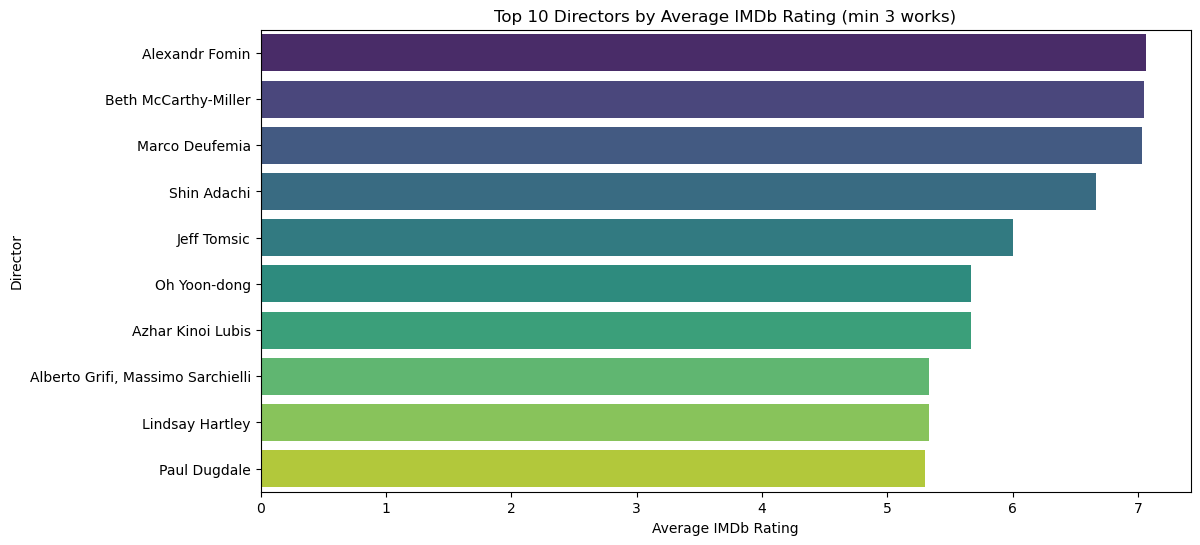

In [63]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(3작품 이상)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9576/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


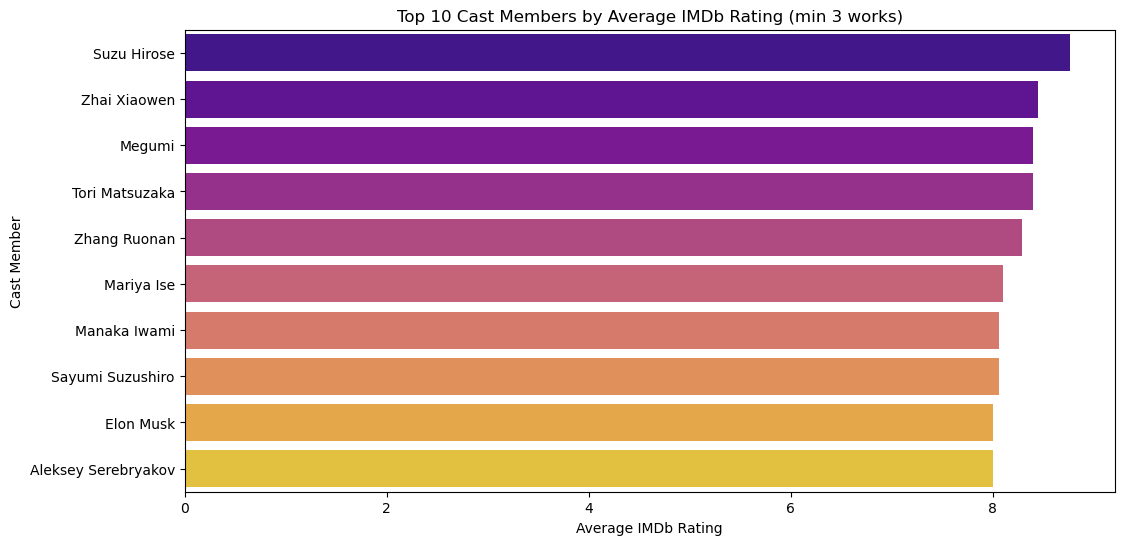

In [64]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉(월) 분석

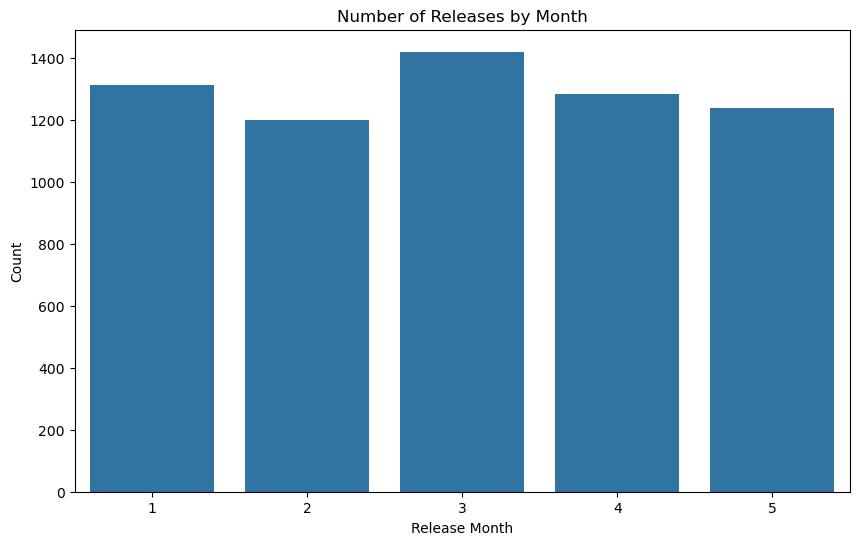

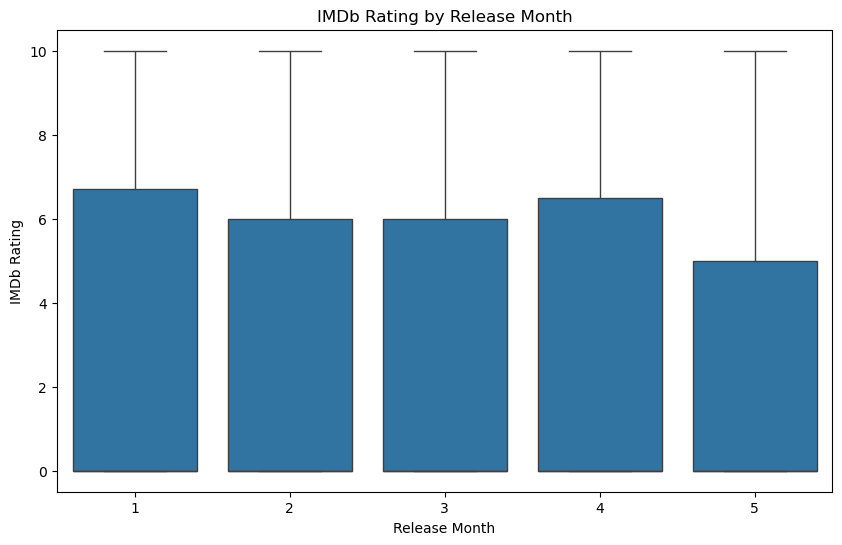

In [65]:
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()